# Aqui Importamos as Bibliotecas que usamos para fazer essa Análise de Rh da IBM:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

# Carregando os Dados:

In [3]:
rh = pd.read_csv(r"C:\Users\Work\Downloads\archive (1).zip")


In [4]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

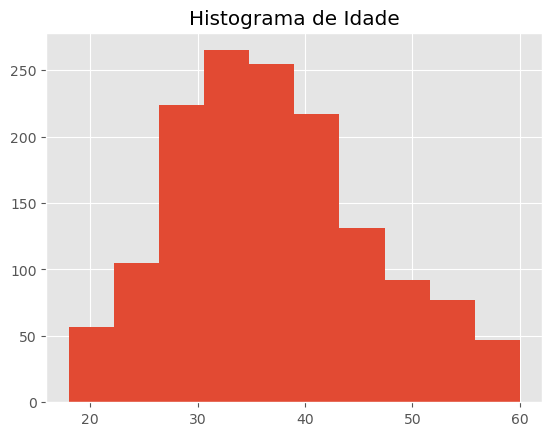

In [7]:
grf = plt.hist(rh.Age)
grf = plt.title('Histograma de Idade')

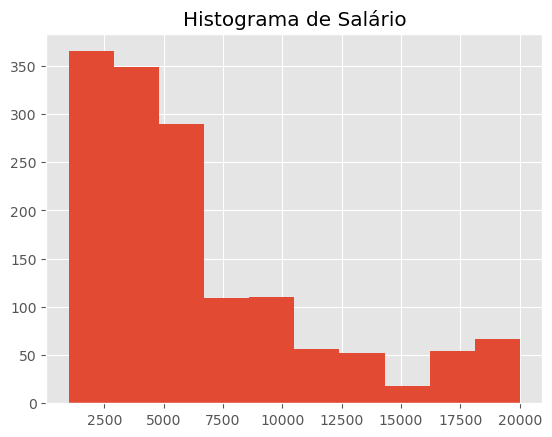

In [8]:
grf = plt.hist(rh.MonthlyIncome)
grf = plt.title('Histograma de Salário')

In [9]:
rh.EducationField.value_counts(1)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

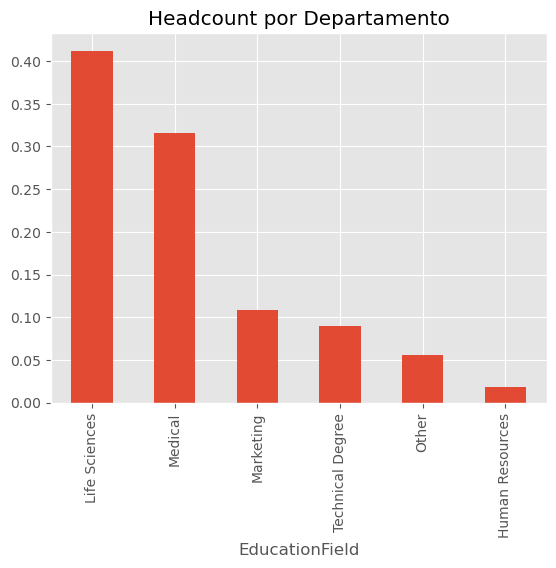

In [10]:
grf = rh.EducationField.value_counts(1).plot.bar()
grf = plt.title('Headcount por Departamento')

Após essa breve análise observamos que a área de "Life Science / Medical" são as áreas com mais pessoas formadas e na sequência observamos que temos menos funcioários formados é na área de "Human Rsources".

In [12]:
rh.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [13]:
rh.Gender.value_counts(1)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

Aqui fizemos uma breve análise para ver a quantidade em números e em porcentagem de Homens e Mulheres na IBM!

# Análise Bivariada

A análise bivariada é uma ferramenta essencial para extrair informações valiosas dos dados, ajudando a revelar padrões e relações que podem ser usadas para previsão, tomada de decisão e otimização de processos. Seja na pesquisa acadêmica, no mercado financeiro ou na análise de negócios, entender como duas variáveis se relacionam é um passo fundamental para uma melhor interpretação dos dados.

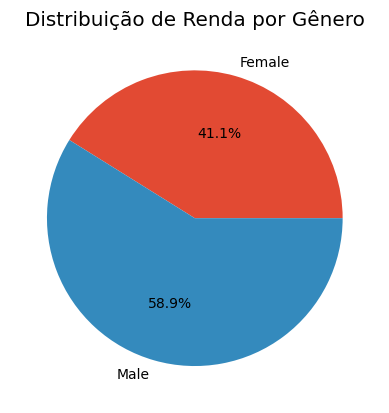

In [17]:
# Agrupar por gênero e somar os rendimentos
income_by_gender = rh.groupby('Gender')['MonthlyIncome'].sum()

# Criar o gráfico de pizza
plt.pie(income_by_gender, labels=income_by_gender.index, autopct='%1.1f%%')

# Adicionar um título
plt.title("Distribuição de Renda por Gênero")

# Mostrar o gráfico
plt.show()


In [18]:
# Criar faixas etárias
bins = [18, 25, 35, 45, 55, 65]  # Intervalos de idade
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
rh['AgeGroup'] = pd.cut(rh['Age'], bins=bins, labels=labels, right=True)

# Calcular a taxa de desligamento por faixa etária
attrition_by_age = rh.groupby('AgeGroup', observed=False)['Attrition'].value_counts(normalize=True).unstack()

# Exibir a taxa de desligamento por faixa etária
print(attrition_by_age)


Attrition        No       Yes
AgeGroup                     
18-25      0.652174  0.347826
26-35      0.808581  0.191419
36-45      0.908120  0.091880
46-55      0.884956  0.115044
56-65      0.829787  0.170213


In [19]:
bins = [18, 25, 35, 45, 55, 65]  # Intervalos de idade
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
rh['AgeGroup'] = pd.cut(rh['Age'], bins=bins, labels=labels, right=True)

attrition_by_age = rh.groupby('AgeGroup', observed=False)['Attrition'].value_counts(normalize=True).unstack()

# Converter para porcentagem e formatar
attrition_by_age = attrition_by_age * 100  # Converter para %
attrition_by_age = attrition_by_age.rename(columns={"No": "Permanência (%)", "Yes": "Rotatividade (%)"})

# Exibir os dados formatados
print(attrition_by_age.round(2))


Attrition  Permanência (%)  Rotatividade (%)
AgeGroup                                    
18-25                65.22             34.78
26-35                80.86             19.14
36-45                90.81              9.19
46-55                88.50             11.50
56-65                82.98             17.02


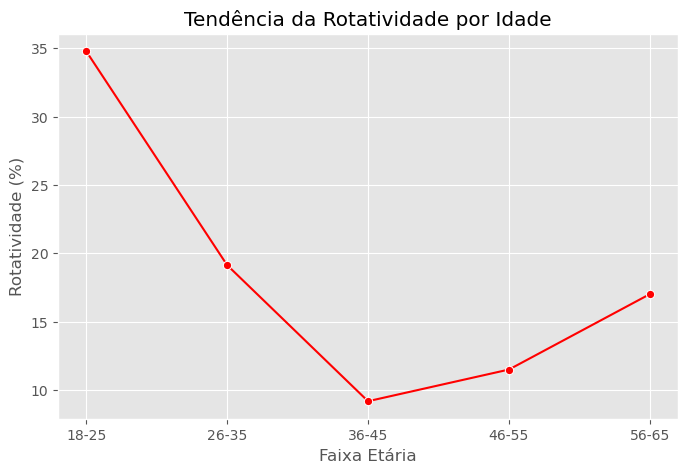

In [20]:
plt.figure(figsize=(8,5))
sns.lineplot(x=attrition_by_age.index, y=attrition_by_age['Rotatividade (%)'], marker='o', color='red')

# Adicionar rótulos
plt.xlabel('Faixa Etária')
plt.ylabel('Rotatividade (%)')
plt.title('Tendência da Rotatividade por Idade')

plt.show()

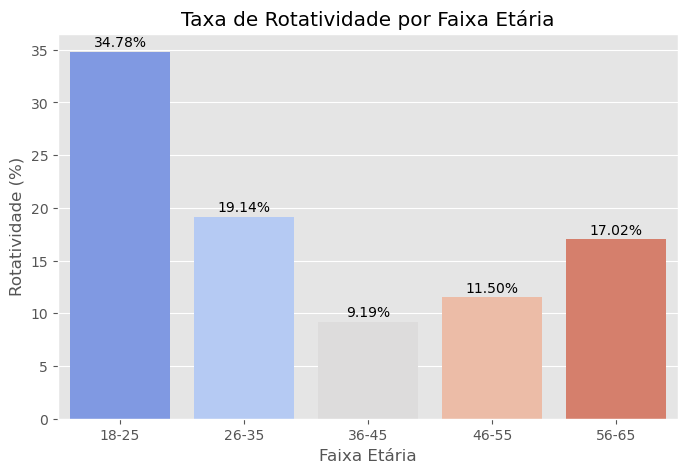

In [21]:
bins = [18, 25, 35, 45, 55, 65]  # Intervalos de idade
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
rh['AgeGroup'] = pd.cut(rh['Age'], bins=bins, labels=labels, right=True)

# Calcular a taxa de desligamento por faixa etária
attrition_by_age = rh.groupby('AgeGroup', observed=False)['Attrition'].value_counts(normalize=True).unstack()

# Converter para porcentagem e formatar
attrition_by_age = attrition_by_age * 100  # Converter para %
attrition_by_age = attrition_by_age.rename(columns={"No": "Permanência (%)", "Yes": "Rotatividade (%)"})

# Criar gráfico de barras
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_by_age.index, y=attrition_by_age['Rotatividade (%)'], hue=attrition_by_age.index, palette='coolwarm', legend=False)

# Adicionar rótulos
plt.xlabel('Faixa Etária')
plt.ylabel('Rotatividade (%)')
plt.title('Taxa de Rotatividade por Faixa Etária')

# Exibir valores em cima das barras
for i, v in enumerate(attrition_by_age['Rotatividade (%)']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()


 A partir desses dados, podemos tirar algumas conclusões sobre a relação entre idade e rotatividade (Attrition):

1 - Funcionários mais jovens (18-25 anos) têm a maior taxa de desligamento (34,78%), o que pode indicar maior instabilidade ou busca por novas oportunidades.

2 - A rotatividade diminui significativamente na faixa de 36-45 anos (9,18%), sugerindo que funcionários nessa idade tendem a permanecer na empresa.

3 - A partir dos 46 anos, a taxa de desligamento sobe novamente, chegando a 17,02% na faixa de 56-65 anos, possivelmente devido à aposentadoria ou mudanças de carreira.

In [43]:
bins = [0, 5, 10, 20, 30, 50]  # Intervalos de distância
labels = ['0-5 km', '6-10 km', '11-20 km', '21-30 km', '31+ km']
rh['DistanceGroup'] = pd.cut(rh['DistanceFromHome'], bins=bins, labels=labels, right=True)


In [45]:
attrition_by_distance = rh.groupby('DistanceGroup', observed=False)['Attrition'].value_counts(normalize=True).unstack()
attrition_by_distance = attrition_by_distance * 100  # Converter para %
attrition_by_distance = attrition_by_distance.rename(columns={"No": "Permanência (%)", "Yes": "Rotatividade (%)"})

print(attrition_by_distance.round(2))

Attrition      Permanência (%)  Rotatividade (%)
DistanceGroup                                   
0-5 km                   86.23             13.77
6-10 km                  85.53             14.47
11-20 km                 80.00             20.00
21-30 km                 77.94             22.06
31+ km                    0.00              0.00


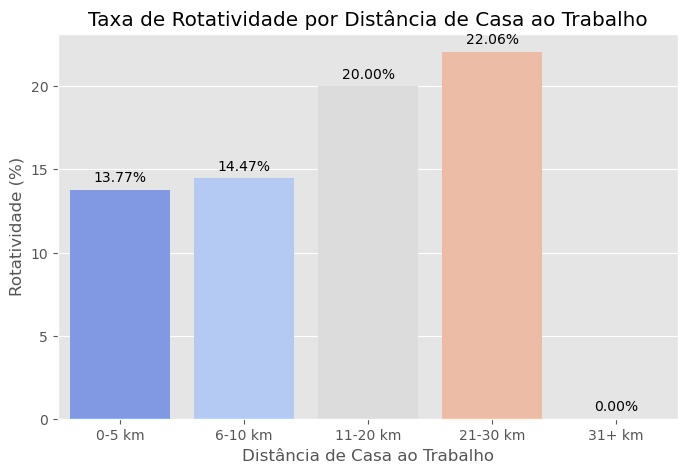

In [47]:
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_by_distance.index, y=attrition_by_distance['Rotatividade (%)'], hue=attrition_by_distance.index, palette='coolwarm', legend=False)

# Adicionar rótulos
plt.xlabel('Distância de Casa ao Trabalho')
plt.ylabel('Rotatividade (%)')
plt.title('Taxa de Rotatividade por Distância de Casa ao Trabalho')

# Exibir valores em cima das barras
for i, v in enumerate(attrition_by_distance['Rotatividade (%)']):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontsize=10)

plt.show()


Isso indica que funcionários que moram mais longe tendem a pedir demissão com mais frequência! Isso pode estar relacionado a fatores como tempo de deslocamento, custos de transporte e qualidade de vida. Algumas interpretações possíveis:

✅ Funcionários que moram mais perto podem estar mais satisfeitos devido à maior comodidade.

🚗 Funcionários que moram longe podem enfrentar mais estresse e cansaço com o deslocamento, aumentando a rotatividade.

💰 Custos de transporte e flexibilidade podem ser fatores importantes na decisão de permanência.